# KNN Regression

- KNN 회귀의 주요 단계:

    - 거리 계산: 예측하려는 데이터 포인트와 모든 훈련 데이터 포인트 간의 거리를 계산합니다. 일반적으로 유클리디안 거리(Euclidean Distance)를 사용합니다.

    - 가장 가까운 K개의 이웃 선택: 계산된 거리 값을 기준으로 가장 가까운 K개의 훈련 데이터 포인트를 선택합니다.

    - 평균 계산: 선택된 K개의 이웃의 출력 값을 평균하여 최종 예측 값을 도출합니다.

- KNN 회귀의 단점:

    1. 계산 비용: KNN 회귀는 예측 시 새로운 데이터 포인트와 모든 훈련 데이터 포인트 간의 거리를 계산해야 하므로, 데이터셋이 클 경우 계산 비용이 매우 높아집니다.

    2. 메모리 사용: 모든 훈련 데이터를 메모리에 저장해야 하므로, 큰 데이터셋일 경우 메모리 사용량이 많아질 수 있습니다.

    3. 노이즈에 민감: KNN 회귀는 이웃 데이터 포인트에 의존하므로, 노이즈가 있는 데이터의 경우 성능이 저하될 수 있습니다.

    4. 차원의 저주: 데이터의 차원이 증가할수록 거리가 희석되는 문제가 발생하여 KNN의 성능이 저하될 수 있습니다. 이를 차원의 저주(the curse of dimensionality)라고 합니다.

    5. K 값 설정: 최적의 K 값을 찾는 것이 어렵습니다. 너무 작은 K 값은 과적합(overfitting)을, 너무 큰 K 값은 과소적합(underfitting)을 초래할 수 있습니다.

## 농어의 길이 / 무게 데이터
from https://bit.ly/perch_data

In [8]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

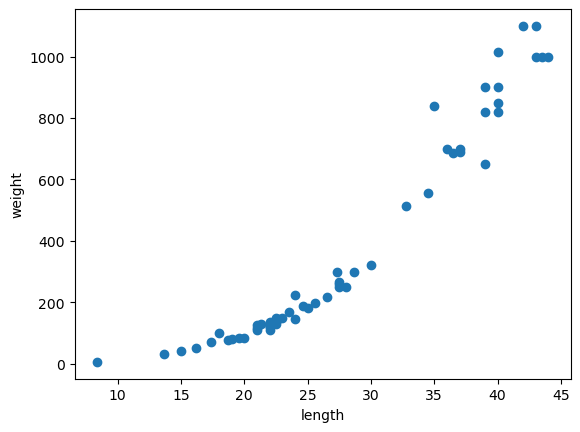

In [14]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [20]:
#사이킷런에서 사용할 훈련세트는 2차원이여야함
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


#### 결정계수
회귀에서 정확도를 평가할 때는 
<span style="color:red">**R = 1-(타깃-예측)^2 의 합 / (타깃-평균)^2 의 합**</span>
으로 계산한 **결정계수**를 이용함

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [41]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 MAE
#타깃 데이터와 예측데이터 사이의 평균 오차가 약 19g임을 알 수 있다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


### 과대적합 VS 과소적합
#### 과대적합 (Overfitting)
과대적합은 모델이 학습 데이터에 너무 잘 맞추어져서 새로운 데이터에 대해 일반화하기 어려운 상태를 말합니다. 즉, 학습 데이터의 노이즈까지 모델이 학습하여 복잡한 구조를 가지게 됩니다. 과대적합된 모델은 학습 데이터에서는 높은 정확도를 보이지만, 검증 데이터나 실제 데이터에서는 성능이 떨어집니다.

- 특징:

    - 학습 데이터에서 높은 성능

    - 검증 데이터에서 낮은 성능

    - 복잡한 모델 구조

- 해결 방법:

    - 모델의 복잡도를 줄이는 정규화(Regularization)

    - 더 많은 훈련 데이터 사용

    - 교차 검증(Cross-Validation) 사용

    - 단순한 모델 선택

#### 과소적합 (Underfitting)
과소적합은 모델이 학습 데이터의 패턴을 충분히 학습하지 못한 상태를 말합니다. 즉, 모델이 너무 단순해서 데이터의 주요 특성을 잘 잡아내지 못합니다. 과소적합된 모델은 학습 데이터와 검증 데이터 모두에서 낮은 성능을 보입니다.

- 특징:

    - 학습 데이터에서 낮은 성능

    - 검증 데이터에서 낮은 성능

    - 단순한 모델 구조

- 해결 방법:

    - 모델의 복잡도를 증가시키는 방법

    - 더 많은 피처 사용

    - 복잡한 모델 선택

In [46]:
print('Scored with train input :', end = ' ' )
print(knr.score(train_input, train_target))

print('Scored with test input :', end = ' ' )
print(knr.score(test_input, test_target))

Scored with train input : 0.9698823289099254
Scored with test input : 0.992809406101064


train input보다 test input의 정확도가 높으므로 과소적합이다.
따라서 모델을 조금 더 복잡하게 즉, 훈련세트에 더 잘 맞게 만들 것이다.

KNN Regression에서는 K의 수를 줄이면 된다.

In [51]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


테스트 세트의 점수가 훈련세트의 점수보다 작아졌으므로 과소적합 문제 해결

In [56]:
knr.predict([[30]]) 

array([275.])